In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

57.283729693256134 -121.82079028035295
-43.78219809912174 -125.81331276437624
-47.560835986485145 -155.11268249222752
37.51907543307665 -167.43807831025453
-69.55112239688174 163.0604035431616
3.888473251005692 135.64692418978768
47.25726476084296 -120.08735264647189
-36.02401404181358 108.35104294694474
-54.9829322450831 -116.48265943696791
1.4601918844625885 -39.59813882152872
-46.662966623277114 -147.16927717750144
-3.177908097457447 63.82091160962841
-64.22181602589394 55.163754076805276
-60.442940739477066 -128.2819166740666
49.66910204421808 153.50379735183878
39.92981896349983 -136.29953820797815
54.79286948079695 -101.037760746499
-3.5823013839301012 -149.07906043247618
57.71609422257106 141.2997373227039
-22.200919077708818 -24.54600391774747
13.825903371295567 -102.49785569613924
-54.012034744105456 132.67482174367575
-43.93270887003763 47.256288033270664
-84.30178837654496 134.1285335303054
-35.086740665820756 -69.52636970728747
3.303252510303224 -145.11941595890198
-8.78071

80.62951176242714 2.5736147974181733
-66.03594541237528 59.290546728887136
32.71149677600211 -130.5179497583425
-54.080976785914366 51.2481894377828
-20.104625561741813 -166.64410554788842
6.030036926964925 -175.07859099131358
-22.98097516333638 143.92507765955918
-46.58504675414191 -55.0352215505214
-55.841184713476395 -43.31799545796602
-53.51310267601369 148.3047246538727
-21.084685959596584 -121.21868612427491
-60.80598108416079 35.77173741500292
-86.23068066598115 -90.42856433218618
74.54225264083931 65.10269840984532
57.91798223064691 42.35415771193172
31.34072949217716 26.574125097828414
-85.89379215446218 79.06414055201094
-2.19404655528227 -83.91961446012918
72.53117578770724 -17.126205608553278
82.65536609816883 -154.4560778899474
16.566919975797717 132.1783639319226
-86.06906589585847 163.6961390964497
-13.99503926831926 170.97052371458108
39.42700041040189 -44.372595259346696
82.95928015729896 122.64073393797071
86.60716371103314 48.34395174671536
-69.05635053882911 -34.214

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geresk
City not found. Skipping...
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | vestmannaeyjar
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | vila nova de milfontes
Processing Record 8 of Set 1 | mitsamiouli
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | herat
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | beloha
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | leningradskiy
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1

Processing Record 39 of Set 4 | hokitika
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | new plymouth
Processing Record 44 of Set 4 | srednekolymsk
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | iquique
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | dolores
Processing Record 49 of Set 4 | qaanaaq
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | banda aceh
Processing Record 2 of Set 5 | axim
Processing Record 3 of Set 5 | sobolevo
Processing Record 4 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 5 of Set 5 | kawalu
Processing Record 6 of Set 5 | kaele
Processing Record 7 of Set 5 | ebebiyin
Processing Record 8 of Set 5 | bonavista
Processing Record 9 of Set 5 | saint-joseph
Processing Record 10 of Set 5 | port macquarie
Processing Record 11 of Set 5 | arraial do cabo
Processing Record 12 of S

Processing Record 30 of Set 8 | bull savanna
Processing Record 31 of Set 8 | yangjiang
Processing Record 32 of Set 8 | mount isa
Processing Record 33 of Set 8 | martinez
Processing Record 34 of Set 8 | choix
Processing Record 35 of Set 8 | caravelas
Processing Record 36 of Set 8 | naron
Processing Record 37 of Set 8 | lokosovo
Processing Record 38 of Set 8 | kurikka
Processing Record 39 of Set 8 | santa isabel do rio negro
Processing Record 40 of Set 8 | sosva
Processing Record 41 of Set 8 | meulaboh
Processing Record 42 of Set 8 | jumla
Processing Record 43 of Set 8 | bengkulu
Processing Record 44 of Set 8 | te anau
Processing Record 45 of Set 8 | hambantota
Processing Record 46 of Set 8 | castro
Processing Record 47 of Set 8 | mahebourg
Processing Record 48 of Set 8 | narsaq
Processing Record 49 of Set 8 | pokaran
Processing Record 50 of Set 8 | hualmay
Processing Record 1 of Set 9 | port hedland
Processing Record 2 of Set 9 | general roca
Processing Record 3 of Set 9 | riyadh
Proces

Processing Record 16 of Set 12 | aleksandrovka
Processing Record 17 of Set 12 | chapais
Processing Record 18 of Set 12 | kemijarvi
Processing Record 19 of Set 12 | benito juarez
Processing Record 20 of Set 12 | sarakhs
Processing Record 21 of Set 12 | callaway
Processing Record 22 of Set 12 | micheweni
Processing Record 23 of Set 12 | galle
Processing Record 24 of Set 12 | puerto lempira
Processing Record 25 of Set 12 | griffith
Processing Record 26 of Set 12 | jimo
Processing Record 27 of Set 12 | vila franca do campo
Processing Record 28 of Set 12 | manaure
Processing Record 29 of Set 12 | aksarka
Processing Record 30 of Set 12 | batticaloa
Processing Record 31 of Set 12 | mahon
Processing Record 32 of Set 12 | angoram
Processing Record 33 of Set 12 | colesberg
Processing Record 34 of Set 12 | bitam
Processing Record 35 of Set 12 | ilhabela
Processing Record 36 of Set 12 | manicore
Processing Record 37 of Set 12 | roald
Processing Record 38 of Set 12 | bubaque
Processing Record 39 of

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,71.19,58,81,9.62,ZA,2022-07-22 10:08:52
1,Sitka,57.0531,-135.3300,53.49,87,100,4.61,US,2022-07-22 10:09:13
2,Dikson,73.5069,80.5464,52.30,73,37,8.10,RU,2022-07-22 10:09:13
3,Vestmannaeyjar,63.4427,-20.2734,50.99,100,100,8.05,IS,2022-07-22 10:09:13
4,Victoria,22.2855,114.1577,93.38,71,1,13.00,HK,2022-07-22 10:09:14
5,Vila Nova De Milfontes,37.7238,-8.7828,70.25,36,0,8.05,PT,2022-07-22 10:09:14
6,Mitsamiouli,-11.3847,43.2844,77.20,67,2,7.74,KM,2022-07-22 10:09:14
7,Ponta Do Sol,32.6667,-17.1000,73.13,64,12,3.29,PT,2022-07-22 10:09:15
8,Herat,34.5000,62.0000,102.04,7,0,26.13,AF,2022-07-22 10:09:15
9,Tuktoyaktuk,69.4541,-133.0374,51.71,76,100,7.83,CA,2022-07-22 10:09:15


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-07-22 10:08:52,-33.5906,26.8910,71.19,58,81,9.62
1,Sitka,US,2022-07-22 10:09:13,57.0531,-135.3300,53.49,87,100,4.61
2,Dikson,RU,2022-07-22 10:09:13,73.5069,80.5464,52.30,73,37,8.10
3,Vestmannaeyjar,IS,2022-07-22 10:09:13,63.4427,-20.2734,50.99,100,100,8.05
4,Victoria,HK,2022-07-22 10:09:14,22.2855,114.1577,93.38,71,1,13.00
5,Vila Nova De Milfontes,PT,2022-07-22 10:09:14,37.7238,-8.7828,70.25,36,0,8.05
6,Mitsamiouli,KM,2022-07-22 10:09:14,-11.3847,43.2844,77.20,67,2,7.74
7,Ponta Do Sol,PT,2022-07-22 10:09:15,32.6667,-17.1000,73.13,64,12,3.29
8,Herat,AF,2022-07-22 10:09:15,34.5000,62.0000,102.04,7,0,26.13
9,Tuktoyaktuk,CA,2022-07-22 10:09:15,69.4541,-133.0374,51.71,76,100,7.83


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

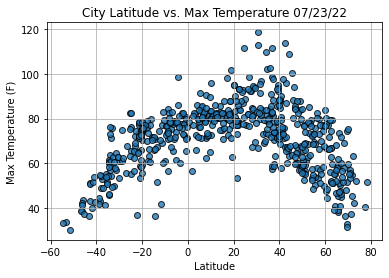

In [29]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

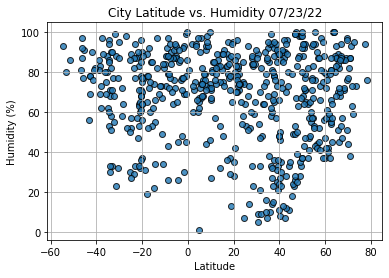

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

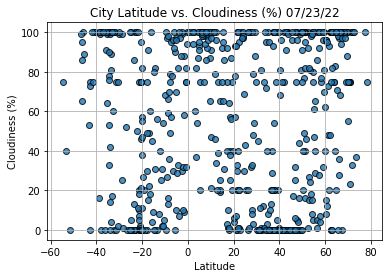

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

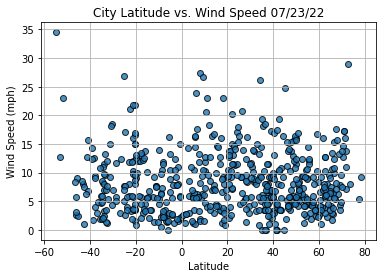

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2022-07-22 10:09:16
Lat                        3.0707
Lng                      172.7902
Max Temp                     81.9
Humidity                       75
Cloudiness                     60
Wind Speed                    8.5
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sitka,US,2022-07-22 10:09:13,57.0531,-135.3300,53.49,87,100,4.61
2,Dikson,RU,2022-07-22 10:09:13,73.5069,80.5464,52.30,73,37,8.10
3,Vestmannaeyjar,IS,2022-07-22 10:09:13,63.4427,-20.2734,50.99,100,100,8.05
4,Victoria,HK,2022-07-22 10:09:14,22.2855,114.1577,93.38,71,1,13.00
5,Vila Nova De Milfontes,PT,2022-07-22 10:09:14,37.7238,-8.7828,70.25,36,0,8.05


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

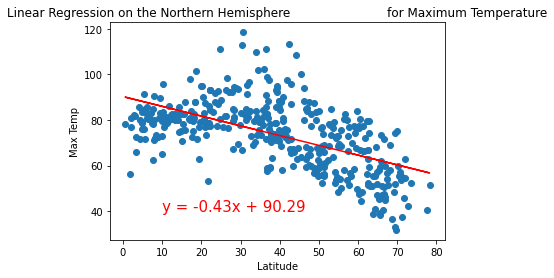

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

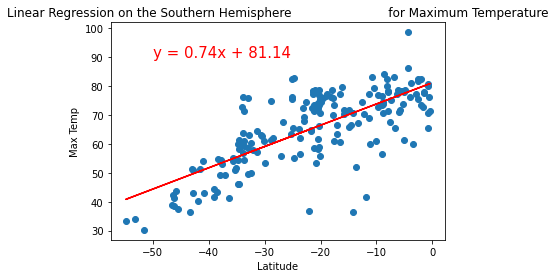

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

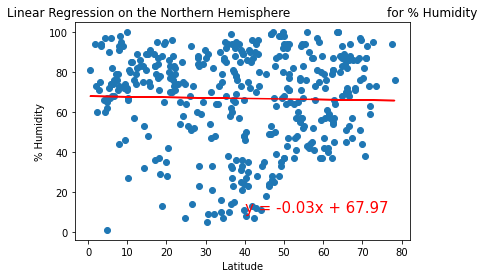

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

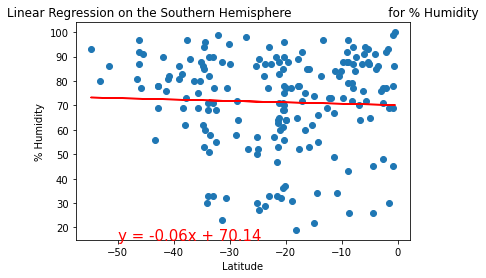

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

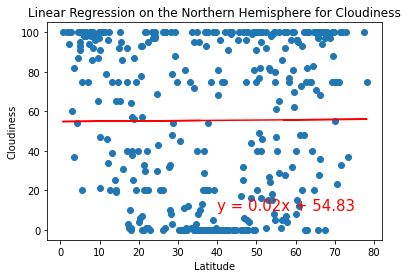

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness','Cloudiness',(40,10))

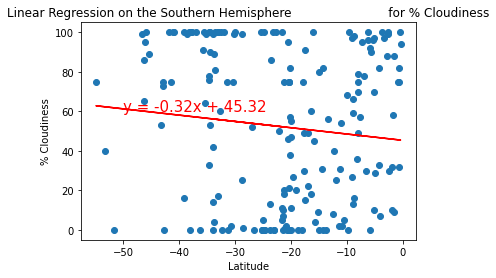

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

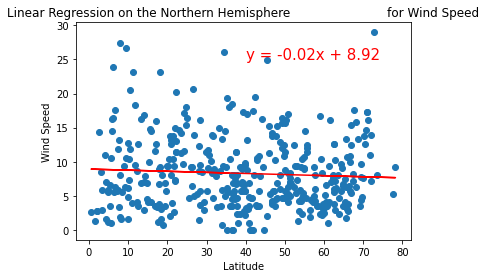

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

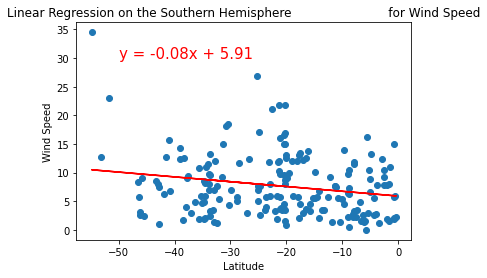

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))